# Case Study : Walmert Sales Prediction

## Data Description
You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week
test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [1]:
from pyforest import *

## Loading all data

In [30]:
# loading all features of data
feat = pd.read_csv('features.csv')

In [31]:
feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [32]:
# dimensions of features
feat.shape

(8190, 12)

In [33]:
feat.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [34]:
# loading all stores info data
stores = pd.read_csv('stores.csv')

In [35]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [36]:
# dimensions of stores info
stores.shape

(45, 3)

In [37]:
# loading main data with sales predicition for training
data = pd.read_csv('train.csv')

In [38]:
# loading main data with sales predicition for training
test = pd.read_csv('test.csv')

In [39]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [40]:
# dimensions of train data
data.shape

(421570, 5)

In [41]:
# loading test data with sales predicition for training
test.shape

(115064, 4)

#### Data manupilation

In [42]:
from statistics import mean

feat['CPI'] = feat['CPI'].fillna(mean(feat['CPI']))
feat['Unemployment'] = feat['Unemployment'].fillna(mean(feat['Unemployment']))

In [46]:
feat['MarkDown3'] = feat['MarkDown3'].fillna(0)

In [27]:
# m1 = feat['MarkDown1'].fillna(0)
# m2 = feat['MarkDown2'].fillna(0)
# m3 = feat['MarkDown3'].fillna(0)
# m4 = feat['MarkDown4'].fillna(0)
# m5 = feat['MarkDown5'].fillna(0)

# mm1 = mean(m1)
# mm2 = mean(m2)
# mm3 = mean(m3)
# mm4 = mean(m4)
# mm5 = mean(m5)

# feat['MarkDown1'] = feat['MarkDown1'].fillna(value=mm1)
# feat['MarkDown2'] = feat['MarkDown2'].fillna(value=mm2)
# feat['MarkDown3'] = feat['MarkDown3'].fillna(value=mm3)
# feat['MarkDown4'] = feat['MarkDown4'].fillna(value=mm4)
# feat['MarkDown5'] = feat['MarkDown5'].fillna(value=mm5)

In [47]:
feat = pd.DataFrame(data=feat)

In [48]:
feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,0.0,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,0.0,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,0.0,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,0.0,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,0.0,NaN,NaN,211.350143,8.106,False


In [49]:
# merging(adding) all features with training data
new_data = pd.merge(feat, data, on=['Store','Date','IsHoliday'], how='inner')

In [50]:
# merging(adding) all features with test data
new_data_test = pd.merge(feat, test, on=['Store','Date','IsHoliday'], how='inner')

In [51]:
# merging(adding) all stores info with new training data
final_data = pd.merge(new_data,stores,how='inner',on=['Store'])

In [52]:
# merging(adding) all stores info with new test data
final_test_data = pd.merge(new_data_test,stores,how='inner',on=['Store'])

In [53]:
# sorting data with respect to date
final_data = final_data.sort_values(by='Date')

In [54]:
# sorting data with respect to date
final_test_data = final_test_data.sort_values(by='Date')

In [55]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,0.0,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,6,11437.81,B,103681


In [56]:
final_test_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,1,A,151315
37648,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,74,B,123737
37647,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,72,B,123737
37646,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,71,B,123737
37645,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,67,B,123737


In [57]:
# dimensions of final data
final_data.shape

(421570, 16)

In [58]:
# dimensions of final test data
final_test_data.shape

(115064, 15)

#### Checking for NaN values

In [59]:
final_data.isnull().values.any()

True

In [60]:
final_data.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3            0
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

In [61]:
final_test_data.isnull().values.any()

True

In [62]:
final_test_data.isnull().sum()

Store               0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3           0
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday           0
Dept                0
Type                0
Size                0
dtype: int64

In [63]:
cpi_m = final_test_data['CPI'].mean(axis = 0, skipna = True) 
up_m = final_test_data['Unemployment'].mean(axis = 0, skipna = True) 

In [64]:
final_test_data['CPI'] = final_test_data['CPI'].fillna(cpi_m)
final_test_data['Unemployment'] = final_test_data['Unemployment'].fillna(up_m)

In [65]:
final_test_data.isnull().values.any()

True

In [66]:
final_data['Temperature'] = (final_data['Temperature'] - 32) * (5/9)
final_test_data['Temperature'] = (final_test_data['Temperature'] - 32) * (5/9)

In [67]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,5.727778,2.572,NaN,NaN,0.0,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,6,11437.81,B,103681


In [68]:
#Creating new required variables on train data
final_data['Date'] = pd.to_datetime(final_data['Date'])
final_data['Year'] = final_data['Date'].dt.year
final_data['Month'] = final_data['Date'].dt.month
final_data['Quater'] = final_data['Date'].dt.quarter
final_data['Week']  = final_data['Date'].dt.week
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Month,Quater,Week
0,1,2010-02-05,5.727778,2.572,NaN,NaN,0.0,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315,2010,2,1,5
330761,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,3,14612.19,B,103681,2010,2,1,5
330762,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,4,26323.15,B,103681,2010,2,1,5
330763,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,5,36414.63,B,103681,2010,2,1,5
330764,35,2010-02-05,-2.672222,2.784,NaN,NaN,0.0,NaN,NaN,135.352461,9.262,False,6,11437.81,B,103681,2010,2,1,5


In [69]:
#Creating new required variables on test data
final_test_data['Date'] = pd.to_datetime(final_test_data['Date'])
final_test_data['Year'] = final_test_data['Date'].dt.year
final_test_data['Month'] = final_test_data['Date'].dt.month
final_test_data['Quater'] = final_test_data['Date'].dt.quarter
final_test_data['Week']  = final_test_data['Date'].dt.week
final_test_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size,Year,Month,Quater,Week
0,1,2012-11-02,12.955556,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,1,A,151315,2012,11,4,44
37648,15,2012-11-02,8.533333,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,74,B,123737,2012,11,4,44
37647,15,2012-11-02,8.533333,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,72,B,123737,2012,11,4,44
37646,15,2012-11-02,8.533333,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,71,B,123737,2012,11,4,44
37645,15,2012-11-02,8.533333,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,67,B,123737,2012,11,4,44


In [71]:
from datetime import datetime

In [72]:
final_data['Super_Bowl'] = np.where((final_data['Date']==datetime(2010, 2, 12)) | (final_data['Date']==datetime(2011, 2, 11)) | (final_data['Date']==datetime(2012, 2, 10)) | (final_data['Date']==datetime(2013, 2, 8)),1,0)
final_data['Labour_Day'] = np.where((final_data['Date']==datetime(2010, 9, 10)) | (final_data['Date']==datetime(2011, 9, 9)) | (final_data['Date']==datetime(2012, 9, 7)) | (final_data['Date']==datetime(2013, 9, 6)),1,0)
final_data['Thanksgiving'] = np.where((final_data['Date']==datetime(2010, 11, 26)) | (final_data['Date']==datetime(2011, 11, 25)) | (final_data['Date']==datetime(2012, 11, 23)) | (final_data['Date']==datetime(2013, 11, 29)),1,0)
final_data['Christmas'] = np.where((final_data['Date']==datetime(2010, 12, 31)) | (final_data['Date']==datetime(2011, 12, 30)) | (final_data['Date']==datetime(2012, 12, 28)) | (final_data['Date']==datetime(2013, 12, 27)),1,0)
#........................................................................
final_test_data['Super_Bowl'] = np.where((final_test_data['Date']==datetime(2010, 2, 12)) | (final_test_data['Date']==datetime(2011, 2, 11)) | (final_test_data['Date']==datetime(2012, 2, 10)) | (final_test_data['Date']==datetime(2013, 2, 8)),1,0)
final_test_data['Labour_Day'] = np.where((final_test_data['Date']==datetime(2010, 9, 10)) | (final_test_data['Date']==datetime(2011, 9, 9)) | (final_test_data['Date']==datetime(2012, 9, 7)) | (final_test_data['Date']==datetime(2013, 9, 6)),1,0)
final_test_data['Thanksgiving'] = np.where((final_test_data['Date']==datetime(2010, 11, 26)) | (final_test_data['Date']==datetime(2011, 11, 25)) | (final_test_data['Date']==datetime(2012, 11, 23)) | (final_test_data['Date']==datetime(2013, 11, 29)),1,0)
final_test_data['Christmas'] = np.where((final_test_data['Date']==datetime(2010, 12, 31)) | (final_test_data['Date']==datetime(2011, 12, 30)) | (final_test_data['Date']==datetime(2012, 12, 28)) | (final_test_data['Date']==datetime(2013, 12, 27)),1,0)

In [73]:
# Altering the isHoliday value depending on these new holidays...
final_data['IsHoliday']=final_data['IsHoliday']|final_data['Super_Bowl']|final_data['Labour_Day']|final_data['Thanksgiving']|final_data['Christmas']
final_test_data['IsHoliday']=final_test_data['IsHoliday']|final_test_data['Super_Bowl']|final_test_data['Labour_Day']|final_test_data['Thanksgiving']|final_test_data['Christmas']

## EDA

In [314]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from scipy import stats
from scipy.stats import norm 
from matplotlib.pyplot import pie
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

%matplotlib inline
import gc

In [28]:
# stores
print(stores.head())
grouped=stores.groupby('Type')

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [29]:
sizes=grouped.count()['Size'].round(1)
sizes

Type
A    22
B    17
C     6
Name: Size, dtype: int64

In [30]:
sizes.sum()

45

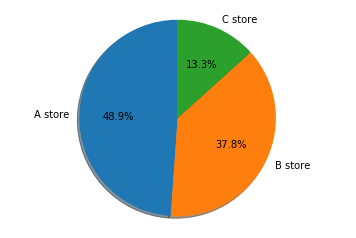

In [31]:
# Pie chart for distribution of types of stores
# refer : https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

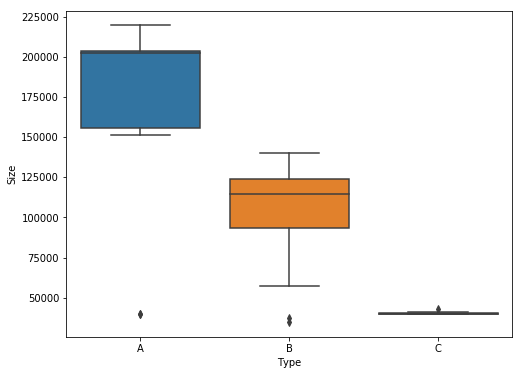

In [32]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)


- By boxplot and piechart, we can say that type A store is the largest store and C is the smallest
- There is no overlapped area in size among A, B, and C.

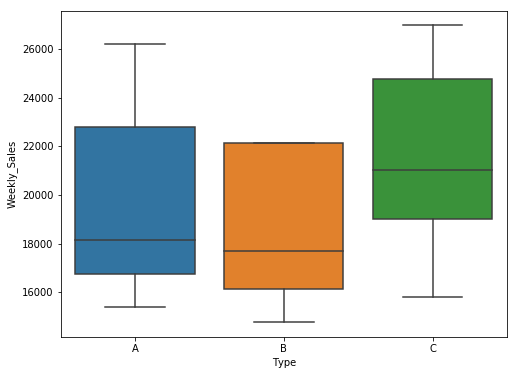

In [33]:
# boxplot for weekly sales for different types of stores
store_sale = pd.concat([stores['Type'], data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

- The median of A is the highest and C is the lowest i.e stores with more sizes have higher sales

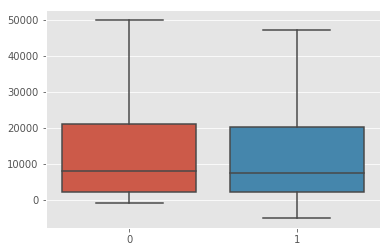

In [70]:
# boxplot for sales for different types of stores
sales_holiday=data[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']
fig = sns.boxplot( data=target, showfliers=False)

In [76]:
# total count of sales on holidays and non holidays
print('sales on non-holiday : ',data[data['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',data[data['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


- Sales in holiday is a little bit more than sales in not-holiday

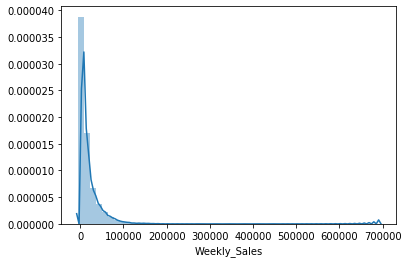

In [24]:
sns.distplot(final_data.Weekly_Sales)

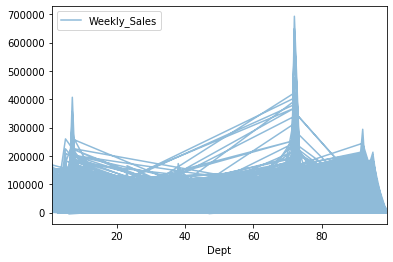

In [25]:
# sales vs dept
final_data.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

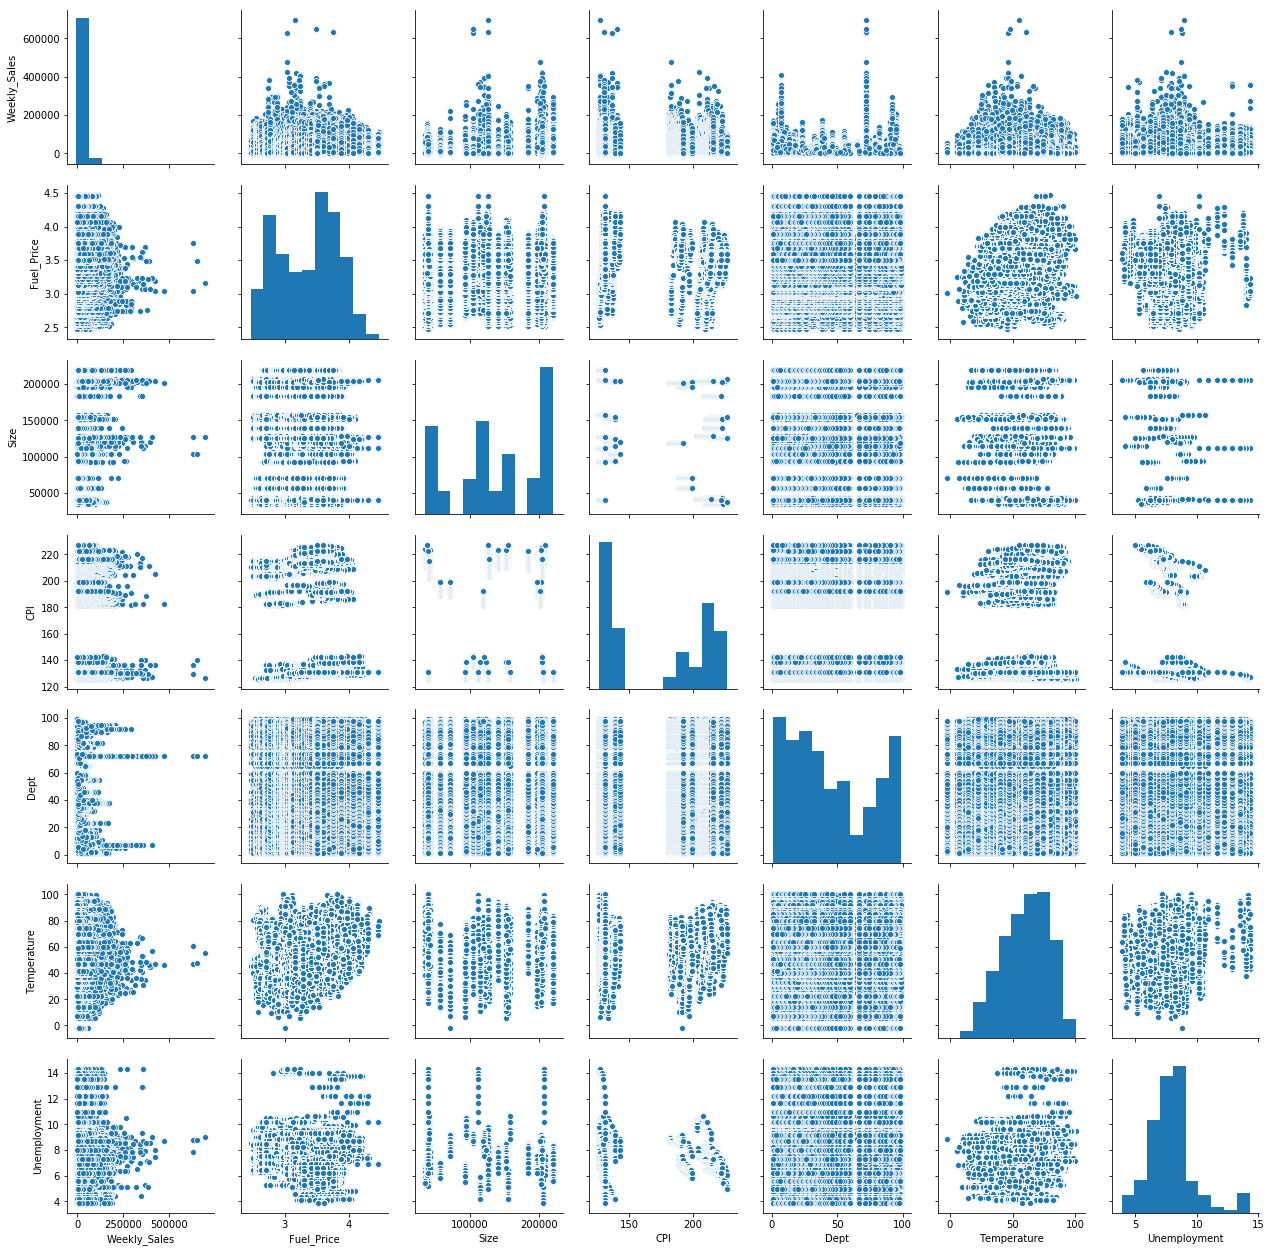

In [35]:
sns.pairplot(final_data, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [48]:
# stores count
final_data.Store.value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [37]:
# Function to plot scatter plot betten selected feature and Weekly_Sales
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column], dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

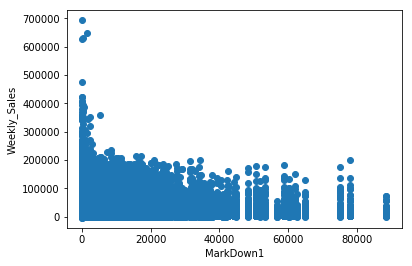

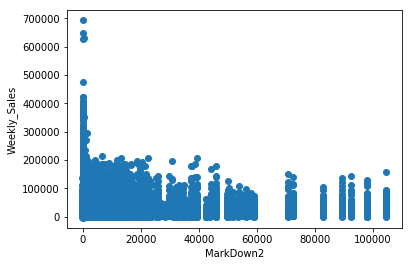

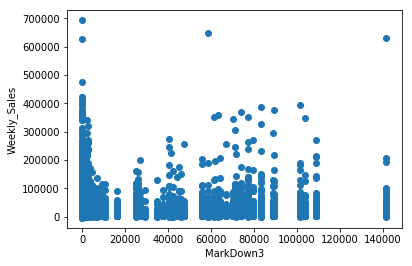

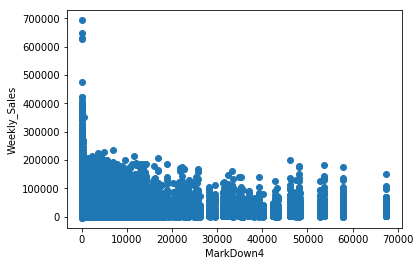

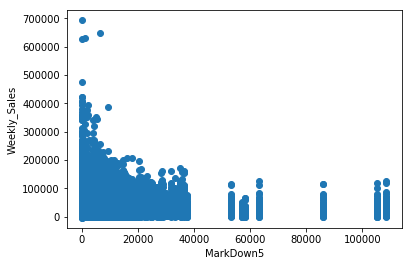

In [38]:
scatter(final_data, 'MarkDown1')
scatter(final_data, 'MarkDown2')
scatter(final_data, 'MarkDown3')
scatter(final_data, 'MarkDown4')
scatter(final_data, 'MarkDown5')

- MarkDown3 seems to be important feature

[]

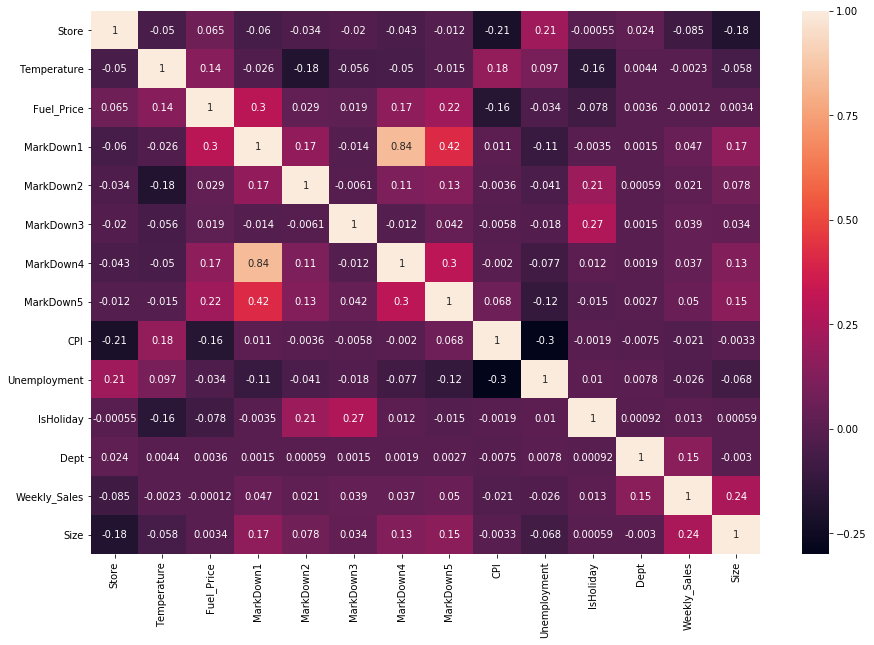

In [39]:
# Plotting correlation between all important features
corr = final_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [52]:
final_data.drop(columns=['MarkDown1','MarkDown2','MarkDown4','MarkDown5'], axis=1, inplace=True)

[]

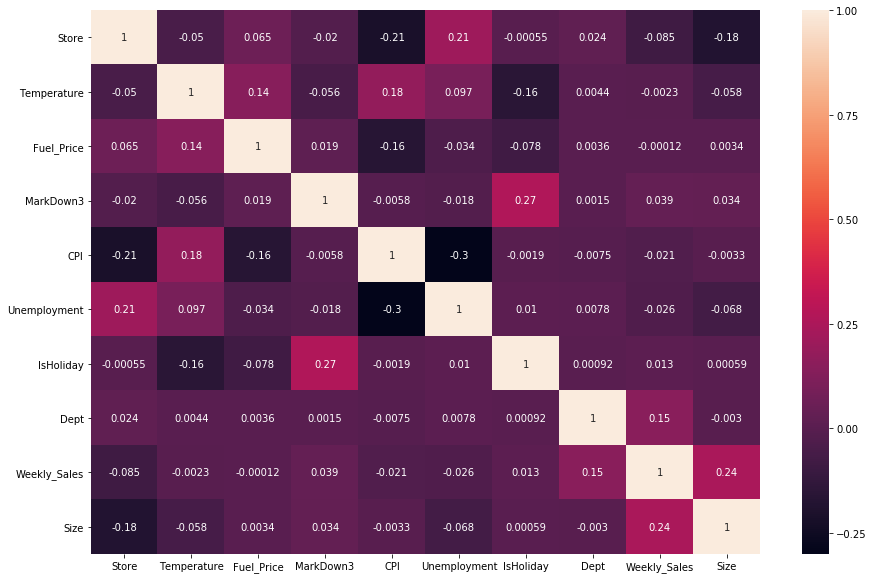

In [208]:
# Plotting correlation between all important features
corr = final_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

## Building train-test set

In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 

In [75]:
# Add column for year
# final_data["Year"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.year
# final_test_data["Year"] = pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d").dt.year

# Add column for day
final_data["Day"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.day
final_test_data["Day"] = pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d").dt.day

# Add column for days to next Christmas
final_data["Days to Next Christmas"] = (pd.to_datetime(final_data["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)
final_test_data["Days to Next Christmas"] = (pd.to_datetime(final_test_data["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [76]:
final_test_data.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Year,Month,Quater,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Days to Next Christmas
0,1,2012-11-02,12.955556,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,...,2012,11,4,44,0,0,0,0,2,59
37648,15,2012-11-02,8.533333,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,...,2012,11,4,44,0,0,0,0,2,59


In [77]:
final_data.shape

(421570, 26)

In [79]:
X=final_data[['Store','Temperature','Fuel_Price','Dept','Type','Size','IsHoliday','MarkDown3','Year','Month','Quater','Week','Super_Bowl','Labour_Day','Thanksgiving','Christmas','Day','Days to Next Christmas']]
y=final_data['Weekly_Sales']

In [80]:
tp = pd.get_dummies(X.Type)
X = pd.concat([X, tp], axis=1)
X = X.drop(columns='Type')

In [81]:
X.head()

,Store,Temperature,Fuel_Price,Dept,Size,IsHoliday,MarkDown3,Year,Month,Quater,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Days to Next Christmas,A,B,C
0,1,5.727778,2.572,1,151315,False,0.0,2010,2,1,5,0,0,0,0,5,329,1,0,0
330761,35,-2.672222,2.784,3,103681,False,0.0,2010,2,1,5,0,0,0,0,5,329,0,1,0
330762,35,-2.672222,2.784,4,103681,False,0.0,2010,2,1,5,0,0,0,0,5,329,0,1,0
330763,35,-2.672222,2.784,5,103681,False,0.0,2010,2,1,5,0,0,0,0,5,329,0,1,0
330764,35,-2.672222,2.784,6,103681,False,0.0,2010,2,1,5,0,0,0,0,5,329,0,1,0


In [82]:
X.shape

(421570, 20)

In [83]:
#train-test split
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

In [84]:
# training size
X_train.shape

(337256, 20)

In [85]:
# testing size
X_test.shape

(84314, 20)

In [86]:
test_data = final_test_data[['Store','Temperature','Fuel_Price','Dept','Type','Size','IsHoliday','MarkDown3','Year','Month','Quater','Week','Super_Bowl','Labour_Day','Thanksgiving','Christmas','Day','Days to Next Christmas']]

In [87]:
tp = pd.get_dummies(test_data.Type)
test_data = pd.concat([test_data, tp], axis=1)
test_data = test_data.drop(columns='Type')

In [88]:
test_data.head()

,Store,Temperature,Fuel_Price,Dept,Size,IsHoliday,MarkDown3,Year,Month,Quater,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Days to Next Christmas,A,B,C
0,1,12.955556,3.386,1,151315,False,50.82,2012,11,4,44,0,0,0,0,2,59,1,0,0
37648,15,8.533333,3.970,74,123737,False,9.00,2012,11,4,44,0,0,0,0,2,59,0,1,0
37647,15,8.533333,3.970,72,123737,False,9.00,2012,11,4,44,0,0,0,0,2,59,0,1,0
37646,15,8.533333,3.970,71,123737,False,9.00,2012,11,4,44,0,0,0,0,2,59,0,1,0
37645,15,8.533333,3.970,67,123737,False,9.00,2012,11,4,44,0,0,0,0,2,59,0,1,0


In [89]:
test_data.shape

(115064, 20)

# Machine Learning Models

### Baseline Model - Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

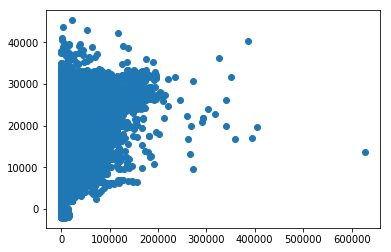

In [39]:
plt.scatter(y_test,y_pred)
plt.show()

In [36]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = lr.score(X_test,y_test)

14566.256911961116
473837823.38784844
21767.816229191398


In [37]:
accuracy

0.08893657966550805

In [38]:
print('accuracy Linear Regression : ',accuracy*100,'%')

accuracy Linear Regression :  8.893657966550805 %


In [655]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### KNN Regressor

In [651]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


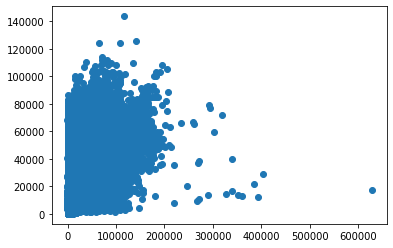

In [652]:
plt.scatter(y_test,y_pred)
plt.show()

In [653]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = knn.score(X_test,y_test)

11708.659990215148
368082325.2664659
19185.471723845258


In [654]:
print('accuracy KNNRegressor: ',accuracy*100,'%')

accuracy KNNRegressor:  29.227612134405355 %


### Decision tree Regessor

In [656]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [657]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = dt.score(X_test,y_test)

1722.5933939796478
19622398.876975816
4429.71769721004


In [658]:
print('accuracy DTR: ',accuracy*100,'%')

accuracy DTR:  96.2271374395133 %


### Random Forest Regressor 

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 250, random_state=0,n_jobs=4)               #RandomForestRegressor
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

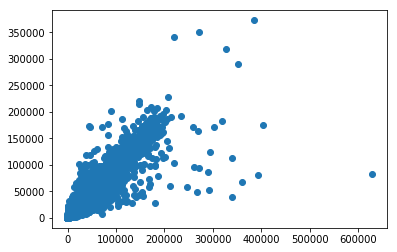

In [40]:
plt.scatter(y_test,y_pred)
plt.show()

In [41]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = rfr.score(X_test,y_test)

1854.0431517366037
33474630.700157594
5785.726462611035


In [42]:
print('accuracy RandomForestRegressor: ',accuracy*100,'%')

accuracy RandomForestRegressor:  93.56372369726243 %


#### Hyperparameter tunning

In [659]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [100 ,200,250 ,300,350, 400]
min_samples_leaf=1
min_samples_split=2,
param = {'n_estimators': n_estimators}

rf = RandomForestRegressor(n_jobs=5)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param, verbose=2, random_state=0, n_jobs = 5)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 19.3min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=5, oob_score=False,
                                                   random_state

In [660]:
rf_random.best_estimator_ 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=5,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [661]:
rfr = RandomForestRegressor(n_estimators = 350,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

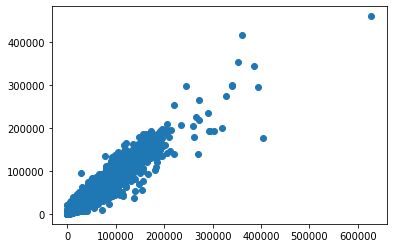

In [662]:
plt.scatter(y_test,y_pred)
plt.show()

In [663]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = rfr.score(X_test,y_test)

1875.9180098654244
17073259.41469413
4131.9800840147


In [664]:
print('accuracy RandomForestRegressor: ',accuracy*100,'%')

accuracy RandomForestRegressor:  96.71726878884522 %


### XGBRegressor

In [61]:
from xgboost import XGBRegressor
xgb_clf = XGBRegressor() 
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

C:\Users\achal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


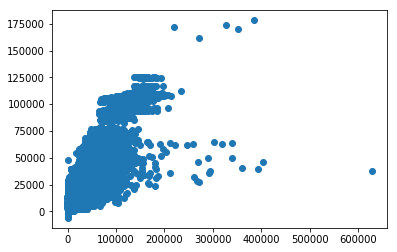

In [62]:
plt.scatter(y_test,y_pred)
plt.show()

In [64]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = xgb_clf.score(X_test,y_test)

6765.676616610423
137275463.18242407
11716.461205604022


In [65]:
print('accuracy XGBRegressor: ',accuracy*100,'%')

accuracy XGBRegressor:  73.6055994600054 %


#### Hyperparameter tunning

In [665]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [0.1,0.5, 0.01, 0.05], 
              'max_depth': [5, 6, 7],
              'n_estimators': [200,300,500]}

xgb_grid = RandomizedSearchCV(xgb1,parameters,cv = 2,n_jobs = 5,verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:  4.3min finished


[12:44:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9708381852254881
{'objective': 'reg:linear', 'nthread': 4, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.5}


In [667]:
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 7, learning_rate= 0.5) 
xb = xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

[12:47:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


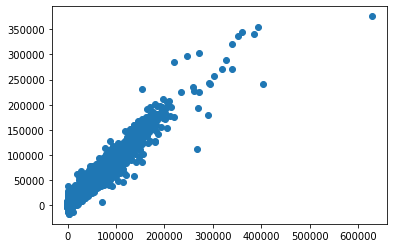

In [668]:
plt.scatter(y_test,y_pred)
plt.show()

In [669]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = xgb_clf.score(X_test,y_test)

1671.4208646599698
10755532.658663388
3279.562876156423


In [670]:
print('accuracy XGBRegressor: ',accuracy*100,'%')

accuracy XGBRegressor:  97.93199869494156 %


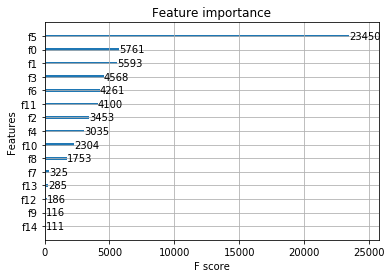

In [481]:
from xgboost import plot_importance
plot_importance(xgb_clf)
plt.show()

### ExtraTreesRegressor

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

C:\Users\achal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


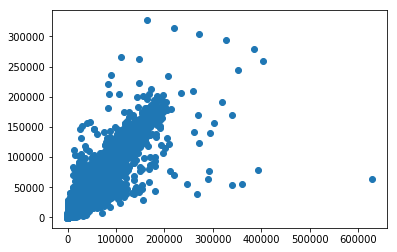

In [58]:
plt.scatter(MAEy_test,y_pred)
plt.show()

In [59]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = etr.score(X_test,y_test)

1960.723738489456
37248082.21356895
6103.120694658508


In [60]:
print('accuracy ExtraTreesRegressor: ',accuracy*100,'%')

accuracy ExtraTreesRegressor:  92.83818988113629 %


#### Hyperparameter tunning

In [671]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_jobs=4) 
parameters = {'n_estimators': [10,20,30,40]}
etr_rsv = RandomizedSearchCV(etr,parameters,cv = 3,n_jobs = 5,verbose=True)

etr_rsv.fit(X_train,y_train)

print(etr_rsv.best_score_)
print(etr_rsv.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:   57.6s finished


0.9728005914701051
{'n_estimators': 40}


In [672]:
etr = ExtraTreesRegressor(n_estimators=40,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

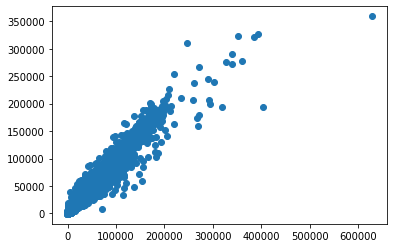

In [673]:
plt.scatter(y_test,y_pred)
plt.show()

In [674]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = etr.score(X_test,y_test)

1286.6739368728797
11166423.532194238
3341.6198964266177


In [675]:
print('accuracy ExtraTreesRegressor: ',accuracy*100,'%')

accuracy ExtraTreesRegressor:  97.85299536803392 %


### getting averages of best models

In [90]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
test_data = sc_X.transform(test_data)

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


dt = DecisionTreeRegressor(random_state=0)
etr = ExtraTreesRegressor(n_estimators=40,n_jobs=4) 
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 7, learning_rate= 0.5) 
rfr = RandomForestRegressor(n_estimators = 350,n_jobs=4)  

dt.fit(X,y)
etr.fit(X,y)
xgb_clf.fit(X,y)
rfr.fit(X,y)

C:\Users\Aditya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Aditya\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:19:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [92]:
etr_pred=etr.predict(test_data)
xgb_clf_pred=xgb_clf.predict(test_data)
rfr_pred=rfr.predict(test_data)
dt_pred = dt.predict(test_data)

In [93]:
final = (etr_pred + xgb_clf_pred + rfr_pred + dt_pred)/4.0

In [94]:
final

array([38564.90624888, 12292.25469286, 42090.00885022, ...,
        7061.37891769,  5686.61336942,   468.17321108])

In [95]:
final.shape

(115064,)

#### Test data submission

In [97]:
sub = pd.DataFrame()
sub['Id'] = final_test_data['Store'].astype(str)+'_'+final_test_data['Dept'].astype(str)+'_'+final_test_data['Date'].astype(str)

In [98]:
sub['Weekly_Sales'] = final

In [99]:
sub.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,38564.906249
37648,15_74_2012-11-02,12292.254693
37647,15_72_2012-11-02,42090.008850
37646,15_71_2012-11-02,3278.303944
37645,15_67_2012-11-02,4895.867256


In [100]:
sub.to_csv('final.csv')

### Feature Importance 

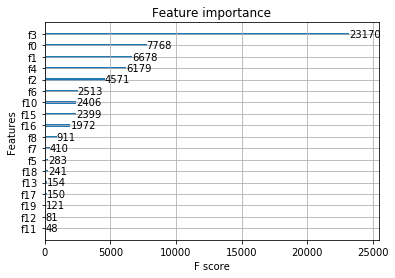

In [103]:
from xgboost import plot_importance
plot_importance(xgb_clf)
plt.show()

# Conclusion :

In [67]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "MAE", "RMSE", "Accuracy"]

x.add_row(["Linear Regression (Baseline)", 14566, 21767, 8.89])
x.add_row(["KNNRegressor", 8769, 14991, 56.87])
x.add_row(["DecisionTreeRegressor", 2375, 7490, 96.02])
x.add_row(["RandomForestRegressor", 1854, 5785, 96.56])
x.add_row(["ExtraTreeRegressor", 1887, 5684, 96.42])
x.add_row(["XGBRegressor", 2291, 5205,97.23 ])

print(x)

+------------------------------+-------+-------+----------+
|            Model             |  MAE  |  RMSE | Accuracy |
+------------------------------+-------+-------+----------+
| Linear Regression (Baseline) | 14566 | 21767 |   8.89   |
|         KNNRegressor         |  8769 | 14991 |  56.87   |
|    DecisionTreeRegressor     |  2375 |  7490 |  96.02   |
|    RandomForestRegressor     |  1854 |  5785 |  96.56   |
|      ExtraTreeRegressor      |  1887 |  5684 |  96.42   |
|         XGBRegressor         |  2291 |  5205 |  97.23   |
+------------------------------+-------+-------+----------+


- Here XGBRegressor performed best among all regression techniques
- Also RandomForestRegressor and RandomForestRegressor performed compartivley better in terms of MAE
- Worst performing were Linear Regression and KNNRegressor
- As most of the values in Markdown1-5 were missing/NaN we decided to remove those features except Markdown-3 as it was showing some sense in plot.
- Some of the data from CPI feature column were also missing, but using mean imputation we filled those missing data
- After conducting all model validation, the most important features came is Department.
- Store ,size are corelated to each other, also Store A has biggest size which affects sale